<a href="https://colab.research.google.com/github/Ravi8275/DS-Repository-of-Raviteja.I/blob/main/Learning_CNN_with_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Schematic of CNN

<img src="https://vitalflux.com/wp-content/uploads/2022/04/Typical-CNN-architecture.png" width="700" height="300">




# Importing all the necessary libraries

In [24]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Loading the Dataset

In [25]:
#Being the existing dataset within the Keras dataset library with the help of load data function the dataset will be split into train and test samples
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [26]:
#Checking on the shapes of datasets after the split
print('Shape of x train :', x_train.shape)
print('Shape of y train :', y_train.shape)
print('Shape of x test :', x_test.shape)
print('Shape of y test:', y_test.shape)

Shape of x train : (60000, 28, 28)
Shape of y train : (60000,)
Shape of x test : (10000, 28, 28)
Shape of y test: (10000,)


Therefor we have 60000 samples in the training dataset and 10000 in the test dataset

The shape of image is 28*28 pixels

# Glance at the Image

Text(0.5, 1.0, 'Image of Second handwritten number within the MNIST train dataset')

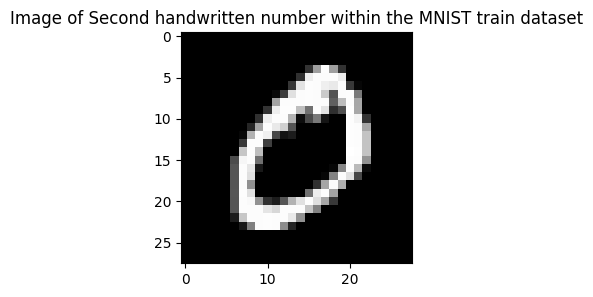

In [27]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[1],cmap='gray')
plt.title('Image of Second handwritten number within the MNIST train dataset')

In [28]:
y_train[1]

0

From the Above it is clear how the dataset looks like.
The input to the model will be handwritten digit and the corresponding label for the image will be it's value

# Preprocessing the Data

Reshaping the data into the form which is accepted by the deep CNN

In [29]:
#Retrieving the shape of an image.
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]
#Reshaping the existing test and train datasets.
X_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
X_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [30]:
print('Shape of X_train :', X_train.shape)
print('Shape of X_test :', X_test.shape)

Shape of X_train : (60000, 28, 28, 1)
Shape of X_test : (10000, 28, 28, 1)


# Constructing Convolutional Neural Networks

In [31]:
#creating a Sequential model
My_model=Sequential([
Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(28,28,1)),
#From the above layer we created first Convolutional layer with 32 layers in it which are of (5,5) size with 'relu' as activation function
#Padding make sure that after process image size would be close to the original one
#Input shape should be mentioned as it's the first convolutional layer
MaxPooling2D(pool_size=(2,2),padding='same'),
#Maxpooling layer serves different purposes.Some amongst them is capturing the important info and reducing the dimesion of the image i.e the unwanted section will be removed
#By doing so it'll be helpful for the next/upcoming convolutional layers to capture more important information and prevents unwanted time consumption
#i.e Playing the key role in feature selection of each sample
#Maxpooling is always next to the convolutional layers
Conv2D(32,(5,5),activation='relu',padding='same'),
MaxPooling2D(pool_size=(2,2),padding='same'),
#After processing the image samples through multiple convolutional and Maxpooling layers individual samples/image info will be in multi dimension which are not accepted my densely connected neural layers
#Therefore it has to be converted into one dimensional which will be done flatten layer
Flatten(),
#Now the data is compatible to pass through neural network
Dense(1024,activation='relu'),
#mentioning the number of neurons with activation function
Dropout(0.4),
#Mention the percent/no:of neurons you want to drop out inorder to avoid overfitting in each training period
Dense(10,activation='softmax')
#No:of neurons at the output end  with softmax as activation function (the case is of multiclassification/sigmoid function incase of binary classification)
])

In [32]:
My_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

# Compiling Neural Network

In [33]:
My_model.compile(optimizer=Adam(learning_rate=0.01),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['sparse_categorical_accuracy'])
#Initialising the optimiser inorder to reduce the value of loss function and update the weights to better prediction.Here it's the best amongst all 'Adam'
#Initialising the loss function inorder to calculate the error during training.sparse categorical cross entropy suits better for the kind of multiple classification where labels are actually numbers
#Defining the metrics inorder to calculate the model performance on validation dataset

# Creating a validation dataset

In [34]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
#test_size of 0.1 indicates that 10 percent of my training dataset(both predictors and target) are considered to be a validation dataset

In [35]:
Model_Performance=My_model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=1000)

Epoch 1/5
54/54 [==============================] - 3s 27ms/step - loss: 9.4533 - sparse_categorical_accuracy: 0.3212 - val_loss: 1.2101 - val_sparse_categorical_accuracy: 0.5830
Epoch 2/5
54/54 [==============================] - 1s 22ms/step - loss: 0.8876 - sparse_categorical_accuracy: 0.7075 - val_loss: 0.5128 - val_sparse_categorical_accuracy: 0.8298
Epoch 3/5
54/54 [==============================] - 1s 24ms/step - loss: 0.5123 - sparse_categorical_accuracy: 0.8377 - val_loss: 0.3811 - val_sparse_categorical_accuracy: 0.8755
Epoch 4/5
54/54 [==============================] - 1s 23ms/step - loss: 0.3957 - sparse_categorical_accuracy: 0.8770 - val_loss: 0.2982 - val_sparse_categorical_accuracy: 0.9075
Epoch 5/5
54/54 [==============================] - 1s 21ms/step - loss: 0.3385 - sparse_categorical_accuracy: 0.8961 - val_loss: 0.2350 - val_sparse_categorical_accuracy: 0.9248


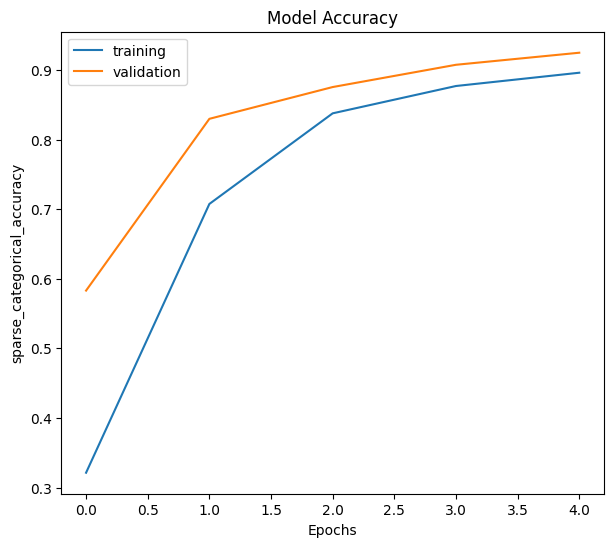

In [36]:
plt.figure(figsize=(7,6))
plt.plot(My_model.history.history['sparse_categorical_accuracy'])
plt.plot(My_model.history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('sparse_categorical_accuracy')
plt.legend(['training','validation'])

# Predictions from the test dataset

In [37]:
My_Model_Predictions=My_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [38]:
My_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2467 - sparse_categorical_accuracy: 0.9230


[0.2467188686132431, 0.9229999780654907]

# Cross Checking the prediction

In [39]:
def showimage(images):
    fig, axes = plt.subplots(1, 10, figsize=(10, 10))  # Creating 10 subplots to display 10 images
    axes = axes.flatten()  # Flattening the axes created to be in 1 dimension for a single row of images
    for img, ax in zip(images, axes):
        ax.imshow(img, cmap='gray')
    plt.tight_layout()
    plt.show()


## Actual Numbers from the Dataset

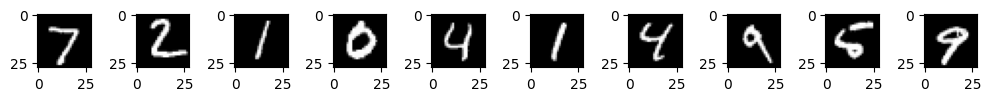

In [40]:
showimage(X_test[:10])

## Predictions made by the Model

In [41]:
results=np.argmax(My_Model_Predictions[:10],axis=1)
print(results)

[7 2 1 0 4 1 4 9 4 9]
